# Analysis of the movie data for each movie industry with the corresponding region population

You can explore the interactive plots as you wish. 

Please ignore the big chunks of codes, we will put them in plot_funtions.py in P3.

In [5]:
%matplotlib inline
import os
import pandas as pd
import requests
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact, interactive
import plotly.graph_objects as go
from IPython.display import display
from scipy.stats import gaussian_kde
from plot_functions import *

In [6]:
DATA_FOLDER = './preprocessed_data1/'

In [7]:
def var_loader(DATA_FOLDER, mode='hollywood'):
    results = []
    results.append(pd.read_csv(DATA_FOLDER + f"{mode}/"+ f"{mode}_data.csv"))
    results.append(pd.read_csv(DATA_FOLDER + f"{mode}/"+ f"{mode}_data_ethnicity.csv"))
    results.append(pd.read_csv(DATA_FOLDER + f"{mode}/"+ f"{mode}_ethnic_realworld.csv"))
    results.append(pd.read_csv(DATA_FOLDER + f"{mode}/"+ f"male_{mode}_realworld_averages.csv"))
    results.append(pd.read_csv(DATA_FOLDER + f"{mode}/"+ f"female_{mode}_realworld_averages.csv"))
    results.append(pd.read_csv(DATA_FOLDER + f"{mode}/"+ f"bothsexes_{mode}_realworld_averages.csv"))
    results.append(pd.read_csv(DATA_FOLDER + f"{mode}/"+ f"male_{mode}_realworld_proportions.csv"))
    results.append(pd.read_csv(DATA_FOLDER + f"{mode}/"+ f"female_{mode}_realworld_proportions.csv"))
    return results

In [8]:
# Charging the Hollywood datasets in their respective dataframes
hollywood_data, hollywood_data_ethnicity, hollywood_ethnic_realworld, \
male_hollywood_realworld_averages, female_hollywood_realworld_averages, \
bothsexes_hollywood_realworld_averages, male_hollywood_realworld_proportions, \
female_hollywood_realworld_proportions = var_loader(DATA_FOLDER, mode="hollywood")

In [9]:
# Charging the Bollywood datasets in their respective dataframes
bollywood_data, bollywood_data_ethnicity, bollywood_ethnic_realworld, \
male_bollywood_realworld_averages, female_bollywood_realworld_averages, \
bothsexes_bollywood_realworld_averages, male_bollywood_realworld_proportions, \
female_bollywood_realworld_proportions = var_loader(DATA_FOLDER, mode="bollywood")

In [10]:
# Charging the East-Asia datasets in their respective dataframes
eastasia_data, eastasia_data_ethnicity, eastasia_ethnic_realworld, \
male_eastasia_realworld_averages, female_eastasia_realworld_averages, \
bothsexes_eastasia_realworld_averages, male_eastasia_realworld_proportions, \
female_eastasia_realworld_proportions = var_loader(DATA_FOLDER, mode="eastasia")

In [11]:
# Prepare the region data
region_data = {
    'Hollywood': {
        'region_data': hollywood_data,
        'male_real_world_proportions': male_hollywood_realworld_proportions,
        'female_real_world_proportions': female_hollywood_realworld_proportions,
        'male_real_world_averages': male_hollywood_realworld_averages,
        'female_real_world_averages': female_hollywood_realworld_averages,
        'bothsexes_real_world_averages': bothsexes_hollywood_realworld_averages,
        'data_ethnicity': hollywood_data_ethnicity,
        'realworld_ethnicity': hollywood_ethnic_realworld,
        'ethnicities': [
            "African Americans", 
            "American Indians", 
            "Arab Americans", 
            "Asian Americans", 
            "Caucasian Americans", 
            "Jewish Americans", 
            "Latino Americans"
        ]
    },
    
    'Bollywood': {
        'region_data': bollywood_data,
        'male_real_world_proportions': male_bollywood_realworld_proportions,
        'female_real_world_proportions': female_bollywood_realworld_proportions,
        'male_real_world_averages': male_bollywood_realworld_averages,
        'female_real_world_averages': female_bollywood_realworld_averages,
        'bothsexes_real_world_averages': bothsexes_bollywood_realworld_averages,
        'data_ethnicity': bollywood_data_ethnicity,
        'realworld_ethnicity': bollywood_ethnic_realworld,
        'ethnicities': [
            "South_Indian_Ethnicities", 
            "North_Indian_Ethnicities", 
            "Eastern_Indian_Ethnicities", 
            "Western_and_Central_Indian_Ethnicities", 
            "Religious_and_Caste_Groups"
        ]
    },
    
    # 'Eastasia': {
    #     'region_data': eastasia_data,
    #     'male_real_world_proportions': male_eastasia_realworld_proportions,
    #     'female_real_world_proportions': female_eastasia_realworld_proportions,
    #     'male_real_world_averages': male_eastasia_realworld_averages,
    #     'female_real_world_averages': female_eastasia_realworld_averages,
    #     'bothsexes_real_world_averages': bothsexes_eastasia_realworld_averages,
    #     'data_ethnicity': eastasia_data_ethnicity,
    #     'realworld_ethnicity': eastasia_ethnic_realworld,
    #     'ethnicities': [
    #         "Chinese", 
    #         "Taiwanese", 
    #         "Japanese", 
    #         "Koreans", 
    #         "Other Asians"
    #     ]
    # }  
}

# Generate the list of unique regions
regions = list(region_data.keys())

periods = ["All periods", "1950-1965", "1966-1980", "1981-1995", "1996-2012"]

# Display example (for the Hollywood datasets)

In [13]:
hollywood_data.head()

,wiki_movie_id,free_movie_id_x,release_x,actor_gender,actor_name,age_at_release,actor_birth_year,actor_ethnicity_label,movie_name,release_y,box_office,countries_label,genres_label,main_genre,actor_ethnicity_classification
0,975900,/m/03vyhn,2001.0,F,Wanda De Jesus,42.0,1958.0,Unknown,Ghosts of Mars,2001.0,14010832.0,United States of America,"Thriller, Science Fiction, Horror, Adventure, ...",Action/Adventure,NaN
1,975900,/m/03vyhn,2001.0,F,Natasha Henstridge,27.0,1974.0,Unknown,Ghosts of Mars,2001.0,14010832.0,United States of America,"Thriller, Science Fiction, Horror, Adventure, ...",Action/Adventure,NaN
2,975900,/m/03vyhn,2001.0,M,Ice Cube,32.0,1969.0,African Americans,Ghosts of Mars,2001.0,14010832.0,United States of America,"Thriller, Science Fiction, Horror, Adventure, ...",Action/Adventure,African Americans
3,975900,/m/03vyhn,2001.0,M,Jason Statham,33.0,1967.0,Unknown,Ghosts of Mars,2001.0,14010832.0,United States of America,"Thriller, Science Fiction, Horror, Adventure, ...",Action/Adventure,NaN
4,975900,/m/03vyhn,2001.0,F,Clea DuVall,23.0,1977.0,Unknown,Ghosts of Mars,2001.0,14010832.0,United States of America,"Thriller, Science Fiction, Horror, Adventure, ...",Action/Adventure,NaN


In [14]:
hollywood_data_ethnicity.head()

,wiki_movie_id,free_movie_id_x,release_x,actor_gender,actor_name,age_at_release,actor_birth_year,actor_ethnicity_label,movie_name,release_y,box_office,countries_label,genres_label,main_genre,actor_ethnicity_classification
0,975900,/m/03vyhn,2001.0,M,Ice Cube,32.0,1969.0,African Americans,Ghosts of Mars,2001.0,14010832.0,United States of America,"Thriller, Science Fiction, Horror, Adventure, ...",Action/Adventure,African Americans
1,975900,/m/03vyhn,2001.0,F,Pam Grier,52.0,1949.0,African Americans,Ghosts of Mars,2001.0,14010832.0,United States of America,"Thriller, Science Fiction, Horror, Adventure, ...",Action/Adventure,African Americans
2,975900,/m/03vyhn,2001.0,M,Rodney A. Grant,42.0,1959.0,Omaha Tribe of Nebraska,Ghosts of Mars,2001.0,14010832.0,United States of America,"Thriller, Science Fiction, Horror, Adventure, ...",Action/Adventure,American Indians
3,3196793,/m/08yl5d,2000.0,M,Albert Hall,62.0,1937.0,African Americans,Getting Away with Murder: The JonBenét Ramsey ...,2000.0,10809846.5,United States of America,"Mystery, Biographical film, Drama, Crime Drama",Drama,African Americans
4,2314463,/m/0734w5,2006.0,M,Seth Green,31.0,1974.0,Jewish people,Electric Apricot: Quest For Festeroo,2006.0,10809846.5,United States of America,"Parody, Mockumentary, Comedy",Comedy,Jewish Americans


In [15]:
hollywood_ethnic_realworld

,new_period,from to,group,size
0,1950-1965,1946-1965,African Americans,0.1240
1,1950-1965,1946-1965,American Indians,0.0078
2,1950-1965,1946-1965,Arab Americans,0.0000
3,1950-1965,1946-1965,Asian Americans,0.0000
4,1950-1965,1946-1965,Caucasian Americans,0.6910
5,1950-1965,1946-1965,Jewish Americans,0.0330
6,1950-1965,1946-1965,Latino Americans,0.0000
7,1966-1980,1966-2008,African Americans,0.1240
8,1966-1980,1966-2008,American Indians,0.0078
9,1966-1980,1966-2008,Arab Americans,0.0042


In [16]:
male_hollywood_realworld_averages

,Time Period,0,1,2,3,4,5,6,7,8,...,91,92,93,94,95,96,97,98,99,100+
0,1950-1965,2261.38,2211.31,2184.44,2159.25,2119.81,2069.00,2018.88,1969.50,1918.19,...,19.56,14.88,10.94,7.94,5.44,3.75,2.38,1.38,1.00,1.31
1,1966-1980,1985.13,1960.67,1966.87,1984.47,2012.73,2049.00,2090.13,2133.73,2176.87,...,35.73,27.93,21.27,16.07,11.73,8.33,5.80,3.87,2.53,3.60
2,1981-1995,2187.27,2157.47,2134.00,2108.53,2079.60,2046.20,2016.13,1992.13,1975.13,...,52.87,40.80,30.93,23.00,16.87,12.07,8.40,5.73,3.80,6.20
3,1996-2012,2212.41,2208.41,2213.24,2219.18,2225.00,2231.82,2239.06,2247.47,2257.41,...,93.41,71.18,53.18,38.59,27.71,19.35,13.24,8.65,5.47,8.00


In [17]:
female_hollywood_realworld_averages

,Time Period,0,1,2,3,4,5,6,7,8,...,91,92,93,94,95,96,97,98,99,100+
0,1950-1965,2178.50,2142.56,2123.25,2103.69,2068.50,2021.44,1974.62,1927.38,1877.25,...,32.19,24.81,18.62,13.81,9.88,6.81,4.88,3.19,2.19,3.25
1,1966-1980,1893.73,1878.20,1887.47,1907.07,1936.73,1973.67,2013.80,2057.13,2100.33,...,73.13,57.73,44.47,33.93,25.27,18.60,13.20,9.20,6.20,9.67
2,1981-1995,2086.47,2060.60,2038.47,2013.80,1985.47,1952.87,1923.27,1898.40,1880.33,...,147.13,118.80,94.13,73.40,56.40,42.47,31.60,22.93,16.20,29.00
3,1996-2012,2112.59,2108.88,2112.06,2116.18,2120.18,2124.82,2129.71,2135.47,2142.35,...,236.59,193.12,154.71,121.29,93.29,70.24,51.71,37.12,25.71,45.12


In [18]:
bothsexes_hollywood_realworld_averages

,Time Period,0,1,2,3,4,5,6,7,8,...,91,92,93,94,95,96,97,98,99,100+
0,1950-1965,4439.62,4353.88,4307.75,4263.00,4188.38,4090.50,3993.56,3896.88,3795.31,...,51.88,39.50,29.50,21.62,15.38,10.56,7.19,4.69,2.94,4.56
1,1966-1980,3878.87,3838.80,3854.40,3891.53,3949.47,4022.87,4103.87,4190.80,4277.40,...,108.87,85.47,66.07,50.00,37.13,26.93,18.93,13.07,8.60,13.47
2,1981-1995,4273.87,4218.13,4172.60,4122.53,4065.13,3999.07,3939.20,3890.40,3855.47,...,199.87,159.60,125.00,96.47,73.20,54.47,40.07,28.67,19.93,35.40
3,1996-2012,4325.24,4317.12,4325.41,4335.41,4345.29,4356.53,4368.82,4382.88,4399.71,...,329.94,264.18,207.76,160.24,121.12,89.65,64.88,45.65,31.24,53.06


In [19]:
male_hollywood_realworld_proportions

,Time Period,0,1,2,3,4,5,6,7,8,...,91,92,93,94,95,96,97,98,99,100+
0,1950-1965,0.509363,0.507894,0.507095,0.506510,0.506117,0.505806,0.505534,0.505404,0.505411,...,0.377024,0.376709,0.370847,0.367253,0.353706,0.355114,0.331015,0.294243,0.340136,0.287281
1,1966-1980,0.511780,0.510751,0.510292,0.509946,0.509620,0.509338,0.509307,0.509146,0.508924,...,0.328190,0.326781,0.321931,0.321400,0.315917,0.309320,0.306392,0.296098,0.294186,0.267261
2,1981-1995,0.511777,0.511475,0.511432,0.511465,0.511570,0.511669,0.511812,0.512063,0.512293,...,0.264522,0.255639,0.247440,0.238416,0.230464,0.221590,0.209633,0.199860,0.190667,0.175141
3,1996-2012,0.511511,0.511547,0.511683,0.511873,0.512049,0.512293,0.512509,0.512784,0.513082,...,0.283112,0.269438,0.255968,0.240826,0.228781,0.215839,0.204069,0.189485,0.175096,0.150773


In [20]:
female_hollywood_realworld_proportions

,Time Period,0,1,2,3,4,5,6,7,8,...,91,92,93,94,95,96,97,98,99,100+
0,1950-1965,0.490695,0.492104,0.492891,0.493476,0.493866,0.494179,0.494451,0.494596,0.494624,...,0.620470,0.628101,0.631186,0.638760,0.642393,0.644886,0.678720,0.680171,0.744898,0.712719
1,1966-1980,0.488217,0.489267,0.489692,0.490057,0.490377,0.490612,0.490708,0.490868,0.491030,...,0.671719,0.675442,0.673074,0.678600,0.680582,0.690680,0.697306,0.703902,0.720930,0.717892
2,1981-1995,0.488192,0.488510,0.488537,0.488486,0.488415,0.488331,0.488239,0.487970,0.487704,...,0.736128,0.744361,0.753040,0.760858,0.770492,0.779695,0.788620,0.799791,0.812845,0.819209
3,1996-2012,0.488433,0.488492,0.488291,0.488115,0.487926,0.487732,0.487479,0.487230,0.486930,...,0.717070,0.731017,0.744657,0.756927,0.770228,0.783491,0.797010,0.813143,0.822983,0.850358


# Plots

## Ethnicity comparison graph

In [23]:
def create_ethnicity_comparison_graph():

    # Function to calculate the weighted proportions of actor ethnicities per film
    def calculate_weighted_actor_ethnicities(df, period, genre, ethnicities):
        df = df.copy()
        if period != "All periods":
            start_year, end_year = map(int, period.split('-'))
            df = df[df['release_y'].between(start_year, end_year)]
        if genre != "All":
            df = df[df['main_genre'] == genre]
        df['casting_size'] = df.groupby('wiki_movie_id')['wiki_movie_id'].transform('count')
        film_ethnicities = df.groupby(['wiki_movie_id', 'actor_ethnicity_classification']).size().unstack(fill_value=0)
        film_ethnicities = film_ethnicities.div(film_ethnicities.sum(axis=1), axis=0)
        film_ethnicities['casting_size'] = df.groupby('wiki_movie_id')['casting_size'].first()
        weighted_ethnicities = film_ethnicities.drop(columns='casting_size').multiply(film_ethnicities['casting_size'], axis=0).sum() / film_ethnicities['casting_size'].sum()
        weighted_ethnicities = weighted_ethnicities.reindex(ethnicities, fill_value=0)
        return weighted_ethnicities

    # Function to display the comparison graph with Plotly
    def plot_ethnicity_comparison(region, period="All periods", genre="All"):
        # Get the datasets for the selected region
        datasets = region_data[region]
        data_ethnicity = datasets['data_ethnicity']
        realworld_ethnicity = datasets['realworld_ethnicity']
        ethnicities = datasets['ethnicities']

        if period == "All periods":
            population_ethnicities = realworld_ethnicity.groupby('group')['size'].mean()
        else:
            population_ethnicities = realworld_ethnicity[
                realworld_ethnicity['new_period'] == period
            ].set_index('group')['size']
        actor_ethnicities = calculate_weighted_actor_ethnicities(data_ethnicity, period, genre, ethnicities)
        left_values = population_ethnicities.values * 100
        right_values = actor_ethnicities.values * 100
        ethnicities_labels = population_ethnicities.index

        # Calculate a dynamic width based on title length
        title_text = f"Comparison of {region} Industry Ethnicity Proportions<br>(Period: {period}, Genre: {genre})"
        dynamic_width = max(len(title_text) * 7, 900)  # Approximation: 7 pixels per character, min width of 900

        fig = go.Figure()

        # Real-world population bars
        fig.add_trace(go.Bar(
            x=left_values,
            y=ethnicities_labels,
            orientation='h',
            name="Real-world Population",
            marker=dict(color='teal', opacity=0.8),
            hovertemplate="Real-world: %{x:.1f}%"
        ))

        # Movie industry bars
        fig.add_trace(go.Bar(
            x=[-v for v in right_values],
            y=ethnicities_labels,
            orientation='h',
            name=f"{region} Industry",
            marker=dict(color='purple', opacity=0.8),
            hovertemplate=f"{region} Industry: %{{x:.1f}}%%"  # Escaped curly braces
        ))

        # Add a dynamic central line
        fig.add_shape(
            type="line",
            x0=0, x1=0, y0=-0.5, y1=len(ethnicities_labels) - 0.5,
            line=dict(color="black", width=2, dash="dash")
        )

        # Layout updates with added spacing
        fig.update_layout(
            title={
                'text': title_text,
                'x': 0.5,
                'xanchor': 'center',
                'yanchor': 'top',
                'pad': {'b': 10}  # Add padding below the title
            },
            xaxis_title="Proportion (%)",
            yaxis_title="Ethnicity Group",
            barmode='relative',
            xaxis=dict(
                zeroline=True,
                zerolinewidth=1,
                zerolinecolor='gray',
                title=f"← {region} Industry | Real-world Population →",
                tickvals=[-50, -25, 0, 25, 50],
                ticktext=["50", "25", "0", "25", "50"]
            ),
            width=dynamic_width,  # Dynamically set width
            height=600,
            template='plotly_white',
            legend=dict(
                title="Sources",
                orientation="h",
                yanchor="bottom",
                y=1.0,  # Adjust the legend position
                xanchor="center",
                x=0.5
            ),
            margin=dict(t=125)  # Increase top margin to add more space at the top
        )

        # Add annotations outside the bars for better clarity
        for i, (left, right) in enumerate(zip(left_values, right_values)):
            fig.add_annotation(
                x=left + 3.5,
                y=ethnicities_labels[i],
                text=f"{left:.1f}%",
                showarrow=False,
                font=dict(color='teal', size=12),
                align="left"
            )  # Real-world
            fig.add_annotation(
                x=-(right + 3.5),
                y=ethnicities_labels[i],
                text=f"{right:.1f}%",
                showarrow=False,
                font=dict(color='purple', size=12),
                align="right"
            )  # Movie industry

        fig.show()

    # Initialize widgets
    region_widget = widgets.Dropdown(
        options=regions,
        value=regions[0],
        description='Region',
        disabled=False
    )

    period_widget = widgets.Dropdown(
        options=["All periods", "1950-1965", "1966-1980", "1981-1995", "1996-2012"],
        value="All periods",
        description='Period',
        disabled=False
    )

    genres_widget = widgets.Dropdown(
        options=['All'],  # Will update based on selected region
        value='All',
        description='Genre',
        disabled=False
    )

    def update_genres(*args):
        # Get the selected region
        selected_region = region_widget.value
        # Get the genres for the selected region
        selected_data = region_data[selected_region]['data_ethnicity']
        unique_genres = ['All'] + sorted(selected_data['main_genre'].dropna().unique())
        genres_widget.options = unique_genres
        genres_widget.value = 'All'

    # Attach the update_genres function to changes in the region_widget
    region_widget.observe(update_genres, names='value')

    # Initialize genres
    update_genres()

    # Interactive widget
    def plot_ethnicity_comparison_widget(region, period, genre):
        plot_ethnicity_comparison(region, period, genre)

    interactive_plot = interact(
        plot_ethnicity_comparison_widget,
        region=region_widget,
        period=period_widget,
        genre=genres_widget
    )

    display(interactive_plot)

def create_ethnicity_comparison_graph():

    # Function to calculate the weighted proportions of actor ethnicities per film
    def calculate_weighted_actor_ethnicities(df, period, genre, ethnicities):
        df = df.copy()
        if period != "All periods":
            start_year, end_year = map(int, period.split('-'))
            df = df[df['release_y'].between(start_year, end_year)]
        if genre != "All":
            df = df[df['main_genre'] == genre]
        df['casting_size'] = df.groupby('wiki_movie_id')['wiki_movie_id'].transform('count')
        film_ethnicities = df.groupby(['wiki_movie_id', 'actor_ethnicity_classification']).size().unstack(fill_value=0)
        film_ethnicities = film_ethnicities.div(film_ethnicities.sum(axis=1), axis=0)
        film_ethnicities['casting_size'] = df.groupby('wiki_movie_id')['casting_size'].first()
        weighted_ethnicities = film_ethnicities.drop(columns='casting_size').multiply(film_ethnicities['casting_size'], axis=0).sum() / film_ethnicities['casting_size'].sum()
        weighted_ethnicities = weighted_ethnicities.reindex(ethnicities, fill_value=0)
        return weighted_ethnicities

    # Function to display the comparison graph with Plotly
    def plot_ethnicity_comparison(region, period="All periods", genre="All"):
        # Get the datasets for the selected region
        datasets = region_data[region]
        data_ethnicity = datasets['data_ethnicity']
        realworld_ethnicity = datasets['realworld_ethnicity']
        ethnicities = datasets['ethnicities']

        if period == "All periods":
            population_ethnicities = realworld_ethnicity.groupby('group')['size'].mean()
        else:
            population_ethnicities = realworld_ethnicity[
                realworld_ethnicity['new_period'] == period
            ].set_index('group')['size']
        actor_ethnicities = calculate_weighted_actor_ethnicities(data_ethnicity, period, genre, ethnicities)
        left_values = population_ethnicities.values * 100
        right_values = actor_ethnicities.values * 100
        ethnicities_labels = population_ethnicities.index

        # Calculate a dynamic width based on title length
        title_text = f"Comparison of {region} Industry Ethnicity Proportions<br>(Period: {period}, Genre: {genre})"
        dynamic_width = max(len(title_text) * 7, 900)  # Approximation: 7 pixels per character, min width of 900

        fig = go.Figure()

        # Real-world population bars
        fig.add_trace(go.Bar(
            x=left_values,
            y=ethnicities_labels,
            orientation='h',
            name="Real-world Population",
            marker=dict(color='teal', opacity=0.8),
            hovertemplate="Real-world: %{x:.1f}%"
        ))

        # Movie industry bars
        fig.add_trace(go.Bar(
            x=[-v for v in right_values],
            y=ethnicities_labels,
            orientation='h',
            name=f"{region} Industry",
            marker=dict(color='purple', opacity=0.8),
            hovertemplate=f"{region} Industry: %{{x:.1f}}%%"  # Escaped curly braces
        ))

        # Add a dynamic central line
        fig.add_shape(
            type="line",
            x0=0, x1=0, y0=-0.5, y1=len(ethnicities_labels) - 0.5,
            line=dict(color="black", width=2, dash="dash")
        )

        # Layout updates with added spacing
        fig.update_layout(
            title={
                'text': title_text,
                'x': 0.5,
                'xanchor': 'center',
                'yanchor': 'top',
                'pad': {'b': 10}  # Add padding below the title
            },
            xaxis_title="Proportion (%)",
            yaxis_title="Ethnicity Group",
            barmode='relative',
            xaxis=dict(
                zeroline=True,
                zerolinewidth=1,
                zerolinecolor='gray',
                title=f"← {region} Industry | Real-world Population →",
                tickvals=[-50, -25, 0, 25, 50],
                ticktext=["50", "25", "0", "25", "50"]
            ),
            width=dynamic_width,  # Dynamically set width
            height=600,
            template='plotly_white',
            legend=dict(
                title="Sources",
                orientation="h",
                yanchor="bottom",
                y=1.0,  # Adjust the legend position
                xanchor="center",
                x=0.5
            ),
            margin=dict(t=125)  # Increase top margin to add more space at the top
        )

        # Add annotations outside the bars for better clarity
        for i, (left, right) in enumerate(zip(left_values, right_values)):
            fig.add_annotation(
                x=left + 3.5,
                y=ethnicities_labels[i],
                text=f"{left:.1f}%",
                showarrow=False,
                font=dict(color='teal', size=12),
                align="left"
            )  # Real-world
            fig.add_annotation(
                x=-(right + 3.5),
                y=ethnicities_labels[i],
                text=f"{right:.1f}%",
                showarrow=False,
                font=dict(color='purple', size=12),
                align="right"
            )  # Movie industry

        fig.show()

    # Initialize widgets
    region_widget = widgets.Dropdown(
        options=regions,
        value=regions[0],
        description='Region',
        disabled=False
    )

    period_widget = widgets.Dropdown(
        options=["All periods", "1950-1965", "1966-1980", "1981-1995", "1996-2012"],
        value="All periods",
        description='Period',
        disabled=False
    )

    genres_widget = widgets.Dropdown(
        options=['All'],  # Will update based on selected region
        value='All',
        description='Genre',
        disabled=False
    )

    def update_genres(*args):
        # Get the selected region
        selected_region = region_widget.value
        # Get the genres for the selected region
        selected_data = region_data[selected_region]['data_ethnicity']
        unique_genres = ['All'] + sorted(selected_data['main_genre'].dropna().unique())
        genres_widget.options = unique_genres
        genres_widget.value = 'All'

    # Attach the update_genres function to changes in the region_widget
    region_widget.observe(update_genres, names='value')

    # Initialize genres
    update_genres()

    # Interactive widget
    def plot_ethnicity_comparison_widget(region, period, genre):
        plot_ethnicity_comparison(region, period, genre)

    interactive_plot = interact(
        plot_ethnicity_comparison_widget,
        region=region_widget,
        period=period_widget,
        genre=genres_widget
    )

    display(interactive_plot)


In [24]:
create_ethnicity_comparison_graph()

interactive(children=(Dropdown(description='Region', options=('Hollywood', 'Bollywood'), value='Hollywood'), D…

<function __main__.create_ethnicity_comparison_graph.<locals>.plot_ethnicity_comparison_widget(region, period, genre)>

## Gender proportions graph

In [26]:
def create_gender_proportions_graph():

    # Function to prepare real-world data by setting 'Time Period' as the index
    def prepare_real_world_data(male_real_world_df, female_real_world_df):
        # Check and reset index if 'Time Period' is not in columns
        if 'Time Period' not in male_real_world_df.columns:
            male_real_world_df.reset_index(inplace=True)
        if 'Time Period' not in female_real_world_df.columns:
            female_real_world_df.reset_index(inplace=True)
        # Set 'Time Period' as the index
        male_real_world_df.set_index('Time Period', inplace=True)
        female_real_world_df.set_index('Time Period', inplace=True)
        return male_real_world_df, female_real_world_df

    # Function to calculate weighted gender proportions per genre and period
    def calculate_weighted_gender_proportions(df, period, genre):
        df_filtered = df.copy()
        # Ensure 'release_y' is an integer
        df_filtered['release_y'] = df_filtered['release_y'].astype(int)
        # Filter by period
        if period != "All periods":
            start_year, end_year = map(int, period.split('-'))
            df_filtered = df_filtered[df_filtered['release_y'].between(start_year, end_year)]
        # Filter by genre
        if genre != "All":
            df_filtered = df_filtered[df_filtered['main_genre'] == genre]
        # Remove rows with missing 'actor_gender'
        df_filtered = df_filtered.dropna(subset=['actor_gender'])
        if df_filtered.empty:
            return 0, 0  # No data available
        # Calculate casting size per movie
        df_filtered['casting_size'] = df_filtered.groupby('wiki_movie_id')['wiki_movie_id'].transform('count')
        # Calculate gender counts per movie
        gender_counts = df_filtered.groupby(['wiki_movie_id', 'actor_gender']).size().unstack(fill_value=0)
        # Ensure both 'M' and 'F' columns exist
        for gender_col in ['M', 'F']:
            if gender_col not in gender_counts.columns:
                gender_counts[gender_col] = 0
        # Calculate proportions per movie
        gender_proportions = gender_counts.div(gender_counts.sum(axis=1), axis=0)
        # Add casting size
        gender_proportions['casting_size'] = df_filtered.groupby('wiki_movie_id')['casting_size'].first()
        # Calculate weighted proportions
        weighted_proportions = (
            gender_proportions[['M', 'F']]
            .multiply(gender_proportions['casting_size'], axis=0)
            .sum()
        ) / gender_proportions['casting_size'].sum()
        male_proportion = weighted_proportions['M']
        female_proportion = weighted_proportions['F']
        # Normalize to ensure they sum to 1
        total = male_proportion + female_proportion
        if total > 0:
            male_proportion /= total
            female_proportion /= total
        return male_proportion, female_proportion

    # Function to get real-world gender proportions
    def get_real_world_gender_proportions(period, male_real_world_df, female_real_world_df):
        if period == "All periods":
            male_total = male_real_world_df.sum().sum()
            female_total = female_real_world_df.sum().sum()
        else:
            # Handle cases where period might not be in the index
            if period not in male_real_world_df.index or period not in female_real_world_df.index:
                print(f"Period '{period}' not found in real-world data.")
                male_total = 0
                female_total = 0
            else:
                male_row = male_real_world_df.loc[period]
                female_row = female_real_world_df.loc[period]
                male_total = male_row.sum()
                female_total = female_row.sum()
        total = male_total + female_total
        if total == 0:
            male_proportion = 0.5
            female_proportion = 0.5
        else:
            male_proportion = male_total / total
            female_proportion = female_total / total
        return male_proportion, female_proportion

    # Function to plot gender proportions
    def plot_gender_proportions_widget(region, period, genres):
        plot_gender_proportions(region, period, genres)

    def plot_gender_proportions(region, period="All periods", genres=["All"]):
        # Get the datasets for the selected region
        datasets = region_data[region]
        region_df = datasets['region_data']
        male_real_world_df = datasets['male_real_world_proportions'].copy()
        female_real_world_df = datasets['female_real_world_proportions'].copy()

        # Prepare real-world data
        male_real_world_df, female_real_world_df = prepare_real_world_data(male_real_world_df, female_real_world_df)

        # Prepare list of genres based on the selected region
        if "All" in genres or not genres:
            # Get all genres excluding 'All'
            genre_list = sorted(region_df['main_genre'].dropna().unique())
        else:
            genre_list = genres
        # Initialize list to store proportions
        proportions = []
        for genre in genre_list:
            male_prop, female_prop = calculate_weighted_gender_proportions(region_df, period, genre)
            # Normalize to ensure they sum to 1
            total = male_prop + female_prop
            if total > 0:
                male_prop /= total
                female_proportion = female_prop / total
            proportions.append({
                "Category": genre,
                "Male": male_prop,
                "Female": female_prop,
                "Type": "Genre"
            })
        # Add real-world population proportions
        male_population, female_population = get_real_world_gender_proportions(period, male_real_world_df, female_real_world_df)
        # Normalize to ensure they sum to 1
        total_population = male_population + female_population
        if total_population > 0:
            male_population /= total_population
            female_population /= total_population
        proportions.append({
            "Category": "Real-world Population",
            "Male": male_population,
            "Female": female_population,
            "Type": "Real-world"
        })
        # Create DataFrame
        proportions_df = pd.DataFrame(proportions)
        # Define colors (same for both genres and real-world)
        male_color = 'teal'     # Teal color
        female_color = 'purple'    # Purple color

        title_text = f'Gender Proportions by Genre & Real-world Population in {region}<br>(Period: {period})'
        dynamic_width = max(len(title_text) * 7, 1300)  # Approximation: 7 pixels per character, min width of 1300

        # Create stacked bar chart using Plotly
        fig = go.Figure()
        male_legend_added = False
        female_legend_added = False
        for idx, row in proportions_df.iterrows():
            # Apply pattern or style to real-world bars
            if row['Type'] == 'Real-world':
                # Use pattern fill for real-world bars
                male_pattern = dict(shape='x')  # Diagonal lines
                female_pattern = dict(shape='x')  # Cross
            else:
                # No pattern for genre bars
                male_pattern = dict()
                female_pattern = dict()
            # Add Male bar
            show_male_legend = False
            if not male_legend_added:
                show_male_legend = True
                male_legend_added = True
            fig.add_trace(go.Bar(
                x=[row['Category']],
                y=[row['Male']],
                name='Male',
                marker=dict(color=male_color, pattern=male_pattern),
                hovertemplate=f"Male: {row['Male']*100:.1f}%<extra></extra>",
                showlegend=show_male_legend,
                legendgroup='Male',
            ))
            # Add Female bar
            show_female_legend = False
            if not female_legend_added:
                show_female_legend = True
                female_legend_added = True
            fig.add_trace(go.Bar(
                x=[row['Category']],
                y=[row['Female']],
                name='Female',
                marker=dict(color=female_color, pattern=female_pattern),
                hovertemplate=f"Female: {row['Female']*100:.1f}%<extra></extra>",
                base=[row['Male']],
                showlegend=show_female_legend,
                legendgroup='Female',
            ))
            # Add percentage labels
            # Position male percentage in the middle of the male bar
            if row['Male'] > 0:
                fig.add_annotation(
                    x=row['Category'],
                    y=row['Male']/2,
                    text=f"{row['Male']*100:.1f}%",
                    showarrow=False,
                    font=dict(color='white', size=12, weight='bold' if row['Type'] == 'Real-world' else 'normal'),
                    yanchor='middle',
                    xanchor='center'
                )
            # Position female percentage in the middle of the female bar
            if row['Female'] > 0:
                fig.add_annotation(
                    x=row['Category'],
                    y=row['Male'] + row['Female']/2,
                    text=f"{row['Female']*100:.1f}%",
                    showarrow=False,
                    font=dict(color='white', size=12, weight='bold' if row['Type'] == 'Real-world' else 'normal'),
                    yanchor='middle',
                    xanchor='center'
                )
        # Update layout with added space between title and legend
        fig.update_layout(
            title={
                'text': title_text,
                'x': 0.5,
                'xanchor': 'center',
                'yanchor': 'top',
                'pad': {'b': 20}  # Adds 20 pixels of padding below the title
            },
            width=dynamic_width,  # Dynamically set width
            height=600,
            xaxis_title='Movie Genres Compared to Real-world Population',
            yaxis_title='Proportion',
            barmode='stack',
            template='plotly_white',
            xaxis_tickangle=-25,
            legend=dict(
                title="Gender",
                orientation="h",
                yanchor="bottom",
                y=0.97,  # Adjusted to move the legend down
                xanchor="center",
                x=0.5
            ),
            bargap=0.15,  # Gap between bars
            bargroupgap=0.0,  # Gap between groups
            margin=dict(t=100)  # Increase top margin
        )
        # Adjust bar width when only a few genres are selected
        if len(proportions_df) <= 3:  # Including real-world data
            fig.update_traces(width=0.4)  # Adjust the bar width as needed
        fig.show()

    # Create interactive widgets
    region_widget = widgets.Dropdown(
        options=regions,
        value=regions[0],
        description='Region',
        disabled=False,
    )

    genres_widget = widgets.SelectMultiple(
        options=['All'],  # Initially empty; will update based on selected region
        value=['All'],
        description='Genres',
        disabled=False
    )

    period_widget = widgets.Dropdown(
        options=periods,
        value='All periods',
        description='Period',
        disabled=False,
    )

    def update_genres(*args):
        # Get the selected region
        selected_region = region_widget.value
        # Get the genres for the selected region
        selected_data = region_data[selected_region]['region_data']
        unique_genres = sorted(selected_data['main_genre'].dropna().unique())
        unique_genres = ['All'] + unique_genres
        # Update the options of genres_widget
        genres_widget.options = unique_genres
        genres_widget.value = ['All']

    # Attach the update_genres function to changes in the region_widget
    region_widget.observe(update_genres, names='value')

    # Initialize genres
    update_genres()

    interactive_plot = interactive(
        plot_gender_proportions_widget,
        region=region_widget,
        period=period_widget,
        genres=genres_widget
    )

    display(interactive_plot)


In [27]:
create_gender_proportions_graph()

interactive(children=(Dropdown(description='Region', options=('Hollywood', 'Bollywood'), value='Hollywood'), D…

## Age distribution graph

In [29]:
def create_age_distribution_graph():

    # Function to plot age distribution
    def plot_age_distribution(region, gender='Both', period='All periods', genre='All'):
        # Get the datasets for the selected region
        datasets = region_data[region]
        region_df = datasets['region_data']
        male_real_world_averages = datasets['male_real_world_averages']
        female_real_world_averages = datasets['female_real_world_averages']
        bothsexes_real_world_averages = datasets['bothsexes_real_world_averages']

        # Map the period to start and end years
        period_years = {
            "All periods": (1950, 2012),
            "1950-1965": (1950, 1965),
            "1966-1980": (1966, 1980),
            "1981-1995": (1981, 1995),
            "1996-2012": (1996, 2012)
        }
        start_year, end_year = period_years[period]

        # Get the real population age distribution
        if gender == 'Male':
            df_real = male_real_world_averages.copy()
        elif gender == 'Female':
            df_real = female_real_world_averages.copy()
        else:  # Both
            df_real = bothsexes_real_world_averages.copy()

        # Ensure 'Time Period' is present
        if 'Time Period' not in df_real.columns:
            print("Time Period column not found in real-world data.")
            return

        # Exclude non-age columns
        age_columns = df_real.columns.drop('Time Period', errors='ignore')

        # Convert age columns to numeric
        df_real[age_columns] = df_real[age_columns].apply(pd.to_numeric, errors='coerce')

        # Handle NaN values
        df_real[age_columns] = df_real[age_columns].fillna(0)

        # Aggregate real population data
        if period == "All periods":
            real_age_distribution = df_real[age_columns].sum()
        else:
            filtered_df_real = df_real[df_real['Time Period'] == period]
            if filtered_df_real.empty:
                print(f"No real population data available for the selected period: {period}")
                return
            real_age_distribution = filtered_df_real[age_columns].iloc[0]

        # Normalize the real age distribution
        real_age_distribution = real_age_distribution / real_age_distribution.sum()

        # Clean the index
        real_age_distribution.index = (
            real_age_distribution.index.astype(str)
            .str.replace('+', '', regex=False)
            .astype(int)
        )

        # Filter out invalid ages
        real_age_distribution = real_age_distribution[real_age_distribution.index >= 0]

        # Get the actors' age distribution
        df_actors = region_df.copy()
        df_actors['release_y'] = df_actors['release_y'].astype(int)
        df_actors = df_actors[df_actors['release_y'].between(start_year, end_year)]

        # Clean 'actor_gender' column
        df_actors['actor_gender'] = df_actors['actor_gender'].astype(str).str.upper()

        # Map gender selection to data labels
        gender_mapping = {
            'Male': 'M',
            'Female': 'F',
            'Both': ['M', 'F']
        }
        selected_genders = gender_mapping[gender]

        # Filter by gender
        if gender != 'Both':
            df_actors = df_actors[df_actors['actor_gender'] == selected_genders]
        else:
            df_actors = df_actors[df_actors['actor_gender'].isin(selected_genders)]

        # Filter by genre
        if genre != 'All':
            df_actors = df_actors[df_actors['main_genre'] == genre]

        # Handle empty data
        if df_actors.empty:
            print("No actor data available for the selected filters.")
            return

        # Process actor ages
        actor_ages = df_actors['age_at_release'].dropna().astype(float)
        actor_ages = actor_ages[actor_ages >= 0]  # Filter out negative ages

        # Handle empty actor ages
        if actor_ages.empty:
            print("No actor age data available for the selected filters.")
            return

        # Define a fixed age range for consistency
        age_min = 0
        age_max = 100
        age_range = np.linspace(age_min, age_max, 500)

        # Real population ages
        real_ages = np.repeat(real_age_distribution.index.values, (real_age_distribution * 1000).astype(int))
        real_ages = real_ages[real_ages >= age_min]  # Filter out ages below age_min
        if len(real_ages) == 0:
            print("No real population age data available for the selected filters.")
            return

        # Create Kernel Density Estimation (KDE) for real population
        real_kde = gaussian_kde(real_ages)
        real_density = real_kde(age_range)
        real_density /= real_density.sum()

        # Actor ages
        actor_ages = actor_ages[actor_ages <= age_max]  # Filter out ages above age_max
        actor_kde = gaussian_kde(actor_ages)
        actor_density = actor_kde(age_range)
        actor_density /= actor_density.sum()

        # Handle empty plots
        if real_density.sum() == 0 and actor_density.sum() == 0:
            print("No data available to plot for the selected filters.")
            return

        # Determine the maximum density value and set y-axis range
        max_density = max(real_density.max(), actor_density.max())
        y_max = min(max_density * 1.2, 0.05)  # Add 20% buffer, cap at 0.05

        # Generate dynamic title and width
        title_text = f'Age Distribution Comparison in {region}<br>(Gender: {gender}, Period: {period}, Genre: {genre})'
        dynamic_width = max(len(title_text) * 7, 1100)  # Approximation: 7 pixels per character, min width of 1100

        # Create the figure
        fig = go.Figure()
        fig.add_trace(go.Scatter(
            x=age_range,
            y=real_density,
            name='Real-world Population',
            mode='lines',
            line=dict(color='teal'),
            fill='tozeroy',
            fillcolor='rgba(0, 128, 128, 0.2)',  # Teal with opacity
            hovertemplate='Age %{x:.1f}: %{y:.2%}<extra>Real-world Population</extra>'
        ))
        fig.add_trace(go.Scatter(
            x=age_range,
            y=actor_density,
            name='Actors',
            mode='lines',
            line=dict(color='purple'),
            fill='tozeroy',
            fillcolor='rgba(128, 0, 128, 0.2)',  # Purple with opacity
            hovertemplate='Age %{x:.1f}: %{y:.2%}<extra>Actors</extra>'
        ))
        # Adjust layout with added space between title and legend
        fig.update_layout(
            title={
                'text': title_text,
                'x': 0.5,
                'xanchor': 'center',
                'yanchor': 'top',
                'pad': {'b': 20}  # Add padding below the title
            },
            width=dynamic_width,  # Dynamically set width
            height=550,
            xaxis_title='Age',
            yaxis_title='Density',
            template='plotly_white',
            legend=dict(
                title="Sources",
                orientation="h",
                yanchor="bottom",
                y=0.95,  # Adjust the legend position
                xanchor="center",
                x=0.5
            ),
            xaxis=dict(range=[age_min, age_max]),
            yaxis=dict(range=[0, y_max]),  # Use dynamic y-axis range
            margin=dict(t=100)  # Increase top margin
        )
        fig.show()

    # Initialize widgets
    region_widget = widgets.Dropdown(
        options=regions,
        value=regions[0],
        description='Region'
    )

    gender_widget = widgets.Dropdown(
        options=['Male', 'Female', 'Both'],
        value='Both',
        description='Gender'
    )

    period_widget = widgets.Dropdown(
        options=periods,
        value="All periods",
        description='Period'
    )

    genres_widget = widgets.Dropdown(
        options=['All'],
        value='All',
        description='Genre'
    )

    def update_genres(*args):
        # Get the selected region
        selected_region = region_widget.value
        # Get the genres for the selected region
        selected_data = region_data[selected_region]['region_data']
        unique_genres = ['All'] + sorted(selected_data['main_genre'].dropna().unique())
        # Update the options of genres_widget
        genres_widget.options = unique_genres
        genres_widget.value = 'All'

    # Attach the update_genres function to changes in the region_widget
    region_widget.observe(update_genres, names='value')

    # Initialize genres
    update_genres()

    # Create the interactive plot
    interactive_plot = interactive(
        plot_age_distribution,
        region=region_widget,
        gender=gender_widget,
        period=period_widget,
        genre=genres_widget
    )

    display(interactive_plot)


In [30]:
create_age_distribution_graph()

interactive(children=(Dropdown(description='Region', options=('Hollywood', 'Bollywood'), value='Hollywood'), D…

## Other plots

While exploring the dataset and finding out how to plot the data and what aspects of the data we could make interactive and interesting for readers. 

In this section, you can find various types of plots for differents types of data.

In [32]:
east_asian_ethnicities = [
    'Taiwanese people', 'Koreans', 'Japanese Americans', 'Chinese Americans',
    'Hongkongers', 'Chinese Canadians', 'Chinese Singaporeans', 'Vietnamese people',
]

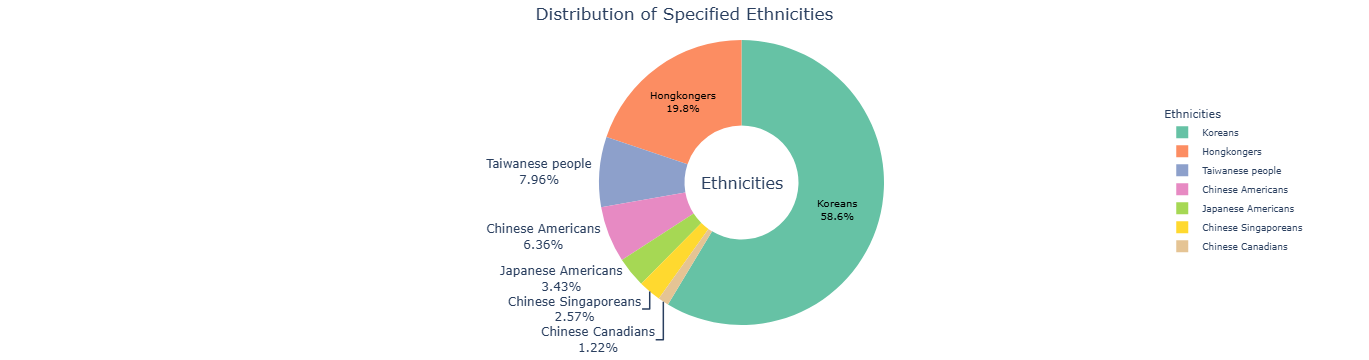

In [33]:
plot_interactive_ethnicity_donut(eastasia_data, 'actor_ethnicity_label', east_asian_ethnicities)

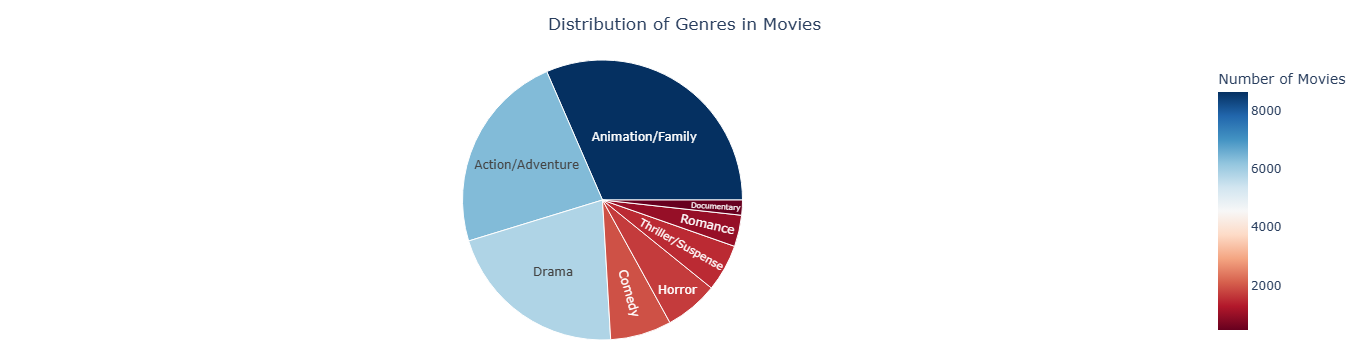

In [34]:
plot_interactive_genre_sunburst(eastasia_data, 'main_genre', min_count_threshold=400)

In [35]:
 plot_interactive_gender_distribution(bollywood_data, 'actor_gender')

In [36]:
plot_interactive_language_treemap(eastasia_data, 'languages')

In [37]:
plot_interactive_ethnicity_genre_heatmap(eastasia_data, 'main_genre', 'actor_ethnicity_label', east_asian_ethnicities, num_top_genres=10)

**Europe plots with the possibility to select one region in particular**

In [39]:
europe_df = pd.read_csv('./preprocessed_data1/Europe/europe_data.csv')
east_europe_df = pd.read_csv('./preprocessed_data1/Europe/east_europe_data.csv')
west_europe_df = pd.read_csv('./preprocessed_data1/Europe/west_europe_data.csv')
nordic_europe_df = pd.read_csv('./preprocessed_data1/Europe/nordic_europe_data.csv')

regions = [
    ('Europe', europe_df),
    ('East Europe', east_europe_df),
    ('West Europe', west_europe_df),
    ('Nordic Europe', nordic_europe_df)
]


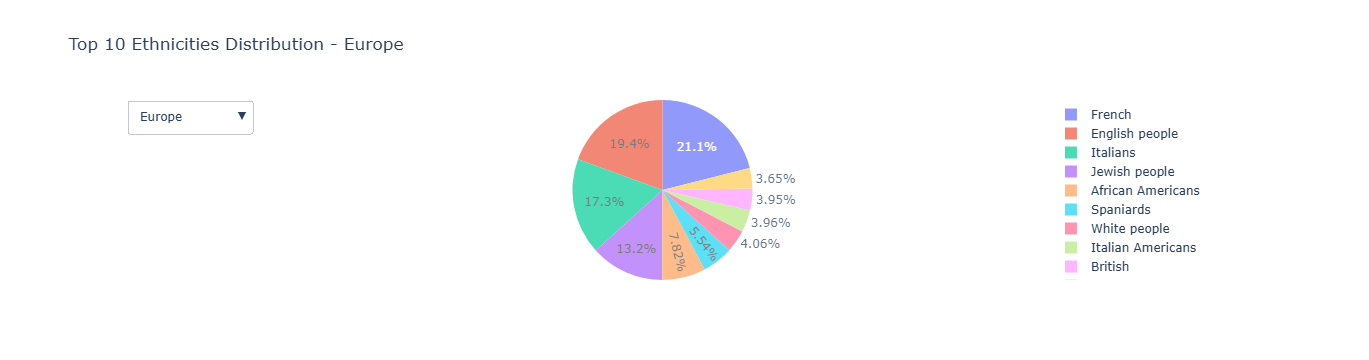

In [40]:
interactive_pie_plot(regions, title='Ethnicities Distribution', category_col='actor_ethnicity_label', num_top=10)

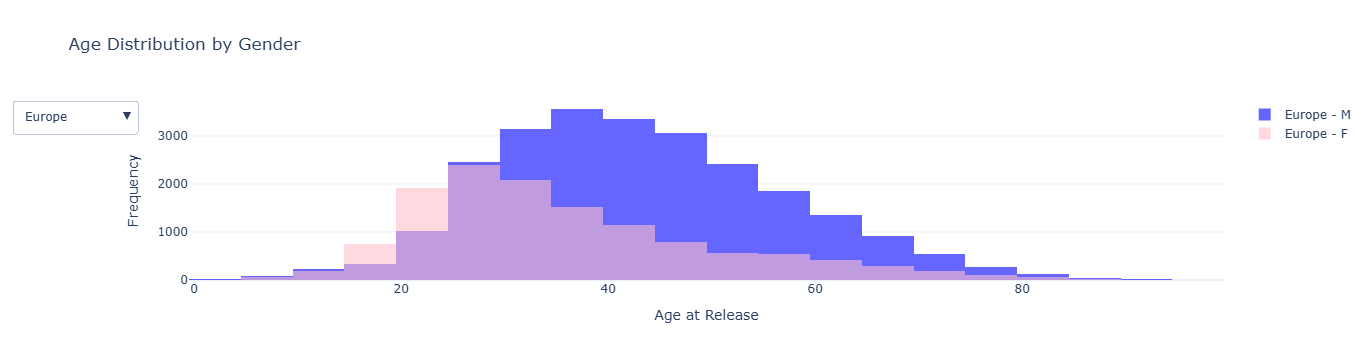

In [41]:
interactive_histogram_plot(regions, title='Age Distribution by Gender', age_col='age_at_release', gender_col='actor_gender', bins=20)